# Colossus tutorial: Spherical overdensity mass and radius

The most commonly used definitions of halo radius and mass are spherical overdensity definitions. Colossus provides convenient routines to convert between radius, mass, and different definitions.

In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

As always with colossus, we need to set a cosmology:

In [2]:
from colossus.cosmology import cosmology
cosmology.setCosmology('planck15');

We begin with the spherical overdensity module, mass_so, which contains only routines that do not depend on a specific halo density profile.

In [3]:
from colossus.halo import mass_so

First, let's look at some of the most commonly used density thresholds themselves. At high redshift, the "virial" overdensity threshold is equal to ~180 times the matter density, and the matter and critical densities are the same. At low redshift, these thresholds diverge:

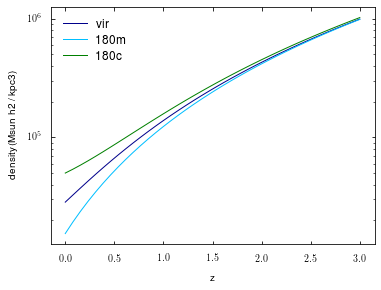

In [4]:
z = np.linspace(0.0, 3.0, 40)

plt.figure()
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('density (Msun h2 / kpc3)')
plt.plot(z, mass_so.densityThreshold(z, 'vir'), label = 'vir');
plt.plot(z, mass_so.densityThreshold(z, '180m'), label = '180m');
plt.plot(z, mass_so.densityThreshold(z, '180c'), label = '180c');
plt.legend();

Note that colossus can handle any overdensity that is a multiple of the critical or mean densities, e.g. 2467m or 155c. We can convert mass and radius into each other, for example, let's get the virial radius of a halo of virial mass 1E12 at z = 0.5, and convert it back:

In [5]:
R = mass_so.M_to_R(1E12, 0.5, 'vir')
print(R)
M2 = mass_so.R_to_M(R, 0.5, 'vir')
print(M2)

152.918690489
1e+12


For any more advanced computations, we need to assume a particular form of the halo density profile. Such functions are located in the mass_defs and mass_adv modules.

In [6]:
from colossus.halo import mass_defs
from colossus.halo import mass_adv

For example, let's convert a virial halo mass to another SO definition, say 200c. Internally, this function makes an assumption about the density profile of the halo, by default an NFW profile. Thus, we need to pass a concentration as well as a mass:

In [7]:
Mvir = 1E12
cvir = 7.0
M200c, R200c, c200c = mass_defs.changeMassDefinition(Mvir, cvir, 0.5, 'vir', '200c')
print(M200c / Mvir)
print(c200c / cvir)

0.902872609265
0.855615479756


As expected, both M200c and c200c are smaller than their virial counterparts. If we don't want to set the concentration manually, we can also use a model to estimate it:

In [8]:
M200c, R200c, c200c = mass_adv.changeMassDefinitionCModel(Mvir, 0.5, 'vir', '200c')
print(M200c / Mvir)
print(c200c / cvir)

0.903956958624
0.876467382439


We get similar results because the assumption cvir = 7 wasn't crazy. The changeMassDefinition() function is a wrapper around a more general function called pseudoEvolve() which finds spherical overdensity radii and masses under the assumption that a profile is static. The name refers to pseudo-evolution, the change in mass and radius over time due to the changing mass definition. Let's see how much a halo pseudo-evolves between z = 1 and z = 0 if it's profile doesn't change at all:

In [9]:
Mvir_z1 = 1E12
cvir_z1 = 7.0
Mvir_z0, Rvir_z0, cvir_z0 = mass_defs.pseudoEvolve(Mvir_z1, cvir_z1, 'vir', 1.0, 0.0) 
print(Mvir_z0 / Mvir_z1)

1.44268324742


The mass of the halo has increased by 44% by z = 0. 